<a href="https://colab.research.google.com/github/raynajindal/MRI_Segmentation/blob/main/MRI_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import os
import cv2
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense, Activation,MaxPooling2D, Flatten, MaxPool2D
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import classification_report
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


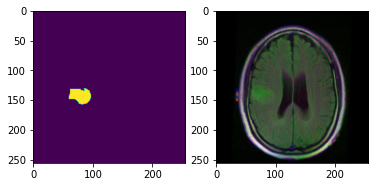

In [ ]:
img1=plt.imread('/content/drive/MyDrive/MRI/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_12_mask.tif')
img2=plt.imread('/content/drive/MyDrive/MRI/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_12.tif')

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img1)
axarr[1].imshow(img2)


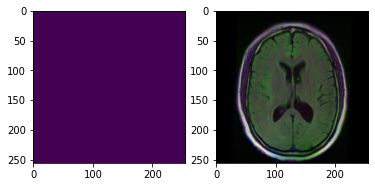

In [ ]:
img3=plt.imread('/content/drive/MyDrive/MRI/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_10_mask.tif')
img4=plt.imread('/content/drive/MyDrive/MRI/lgg-mri-segmentation/kaggle_3m/TCGA_CS_5395_19981004/TCGA_CS_5395_19981004_10.tif')

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img3)
axarr[1].imshow(img4)

In [ ]:
label=[]
dataset=[]
patient_dir=[]
root_dir = '/content/drive/MyDrive/MRI/lgg-mri-segmentation/kaggle_3m/'
patient_dir = os.listdir(root_dir)
for dir in patient_dir:
  patient_images = os.listdir(root_dir+dir)
  for image in patient_images:
    if image.find('mask') != -1:
      mask_img = cv2.imread(root_dir+dir+'/'+image)
      if np.max(mask_img) != 0:
        label.append(1)
      else:
        label.append(0)
      
      mri_image = Image.open(root_dir+dir+'/'+image[0:image.index('mask')-1]+image[image.index('mask')+4:])
      mri_image = mri_image.resize((64,64))
      mri_image = np.asarray(mri_image)
      if len(mri_image.shape) == 3:
        mri_image = np.mean(mri_image, axis=2)
      dataset.append(mri_image)

In [ ]:
X = np.array(dataset)
y = np.array(label)

X.shape

(3892, 64, 64)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=4)

In [ ]:
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)

(3113, 64, 64) (779, 64, 64) (3113,) (779,)


In [ ]:
X_train = X_train.reshape(-1, 64, 64, 1)
X_val = X_val.reshape(-1, 64, 64, 1)

In [ ]:
 # deletes model if it was created before
model = 0 
# Create a neural network. Only the input layer
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(64, 64, 1), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
y_cat_val = to_categorical(y_val,4)
y_cat_train = to_categorical(y_train,4)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_val,y_cat_val),callbacks=[early_stop])

Epoch 1/10
98/98 [==============================] - 14s 138ms/step - loss: 9.4444 - accuracy: 0.7006 - val_loss: 0.6622 - val_accuracy: 0.7651
Epoch 2/10
98/98 [==============================] - 11s 109ms/step - loss: 0.5118 - accuracy: 0.8102 - val_loss: 0.4567 - val_accuracy: 0.7985
Epoch 3/10
98/98 [==============================] - 11s 108ms/step - loss: 0.5809 - accuracy: 0.8095 - val_loss: 0.5162 - val_accuracy: 0.8126
Epoch 4/10
98/98 [==============================] - 11s 108ms/step - loss: 0.2980 - accuracy: 0.8766 - val_loss: 0.4503 - val_accuracy: 0.8267
Epoch 5/10
98/98 [==============================] - 10s 107ms/step - loss: 0.2263 - accuracy: 0.9075 - val_loss: 0.3158 - val_accuracy: 0.8601
Epoch 6/10
98/98 [==============================] - 11s 108ms/step - loss: 0.1737 - accuracy: 0.9319 - val_loss: 0.3064 - val_accuracy: 0.8678
Epoch 7/10
98/98 [==============================] - 11s 108ms/step - loss: 0.1424 - accuracy: 0.9441 - val_loss: 0.3058 - val_accuracy: 0.8729

In [ ]:
model.metrics_names

['loss', 'accuracy']

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
print(losses)

       loss  accuracy  val_loss  val_accuracy
0  9.444352  0.700610  0.662231      0.765083
1  0.511807  0.810151  0.456682      0.798460
2  0.580903  0.809509  0.516231      0.812580
3  0.297982  0.876646  0.450250      0.826701
4  0.226320  0.907485  0.315755      0.860077
5  0.173742  0.931898  0.306443      0.867779
6  0.142360  0.944105  0.305781      0.872914
7  0.151177  0.943784  0.274870      0.878049
8  0.122944  0.951494  0.329001      0.867779
9  0.084506  0.969804  0.293234      0.883184


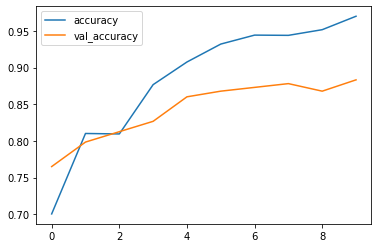

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(X_val,y_cat_val,verbose=0))

['loss', 'accuracy']
[0.2932335436344147, 0.8831835389137268]
